<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/practice_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)

In [0]:
from keras.datasets import imdb
from keras import preprocessing

In [3]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 3s 0us/step


In [0]:
import numpy as np


In [8]:
x = np.asarray(x_train[0])
x

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [9]:
len(x)

218

In [11]:
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 12s 624us/step - loss: 0.6674 - acc: 0.6239 - val_loss: 0.6141 - val_acc: 0.6948
Epoch 2/10
20000/20000 [==============================] - 3s 136us/step - loss: 0.5387 - acc: 0.7539 - val_loss: 0.5234 - val_acc: 0.7384
Epoch 3/10
20000/20000 [==============================] - 3s 145us/step - loss: 0.4588 - acc: 0.7910 - val_loss: 0.4993 - val_acc: 0.7504
Epoch 4/10
20000/20000 [==============================] - 3s 139us/step - loss: 0.4195 - acc: 0.8082 - val_loss: 0.4959 - val_acc: 0.7548
Epoch 5/10
20000/20000 [==============================] - 3s 139us/step - loss: 0.3924 - acc: 0.8252 - val_loss: 0.4960 - val_acc: 0.7586
Epoch 6/10
20000/20000 [==============================] - 3s 140us/step - loss: 0.3702 - acc: 0.8387 - val_loss: 0.4997 - val_acc: 0.7590
Epoch 7/10
20000/20000 [==============================] - 3s 150us/step - loss: 0.3505 - acc: 0.8492 - val_loss: 0

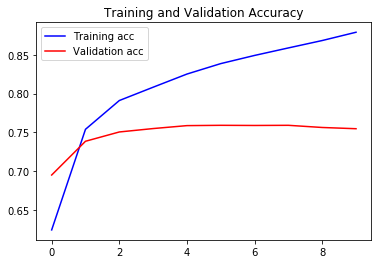

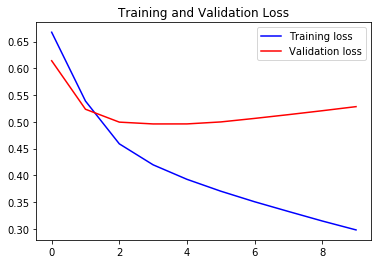

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.plot(epoch, acc, 'b', label = 'Training acc')
plt.plot(epoch, val_acc, 'r', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch, loss, 'b', label = 'Training loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
